<a href="https://colab.research.google.com/github/yeomko22/data_analytics_camp_6th/blob/main/week_10/deeplearning_basics/ch_02_linear_regression_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch 2. torch linear regression

이번 챕터에서는 딥러닝 분야에서 많이 사용되는 torch 라이브러리를 이용해서 간단한 linear regression 모델을 학습시켜 보겠습니다. 그리고 딥러닝에서 모델을 학습시킬 때 사용하는 방식인 오류 역전파(error back propagation) 개념에 대해서 공부해보겠습니다.

## linear regression

학생들의 공부 시간과 시험 점수 데이터가 주어졌습니다.

|x(hour)|y(score)|
|---|---|
|10|90|
|9|80|
|3|50|
|2|30|

우리가 학습시키고자 하는 모델은 공부 시간이 입력으로 주어졌을 때, 시험 점수를 예측하는 선을 찾는 것입니다. 이를 수식으로 표현하면 아래와 같습니다.

$$H(x)=Wx+b$$

H는 hypothesis, W는 weight(직선의 기울기), b는 bias(절편)을 나타냅니다.

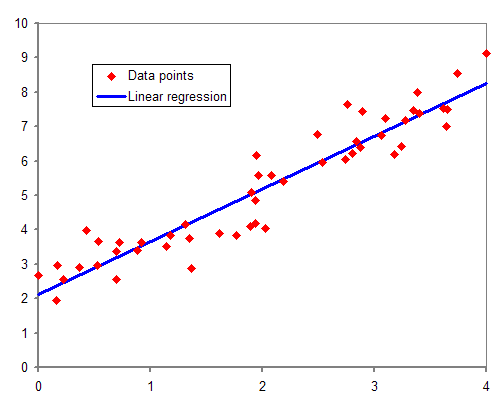

모델이 예측한 값과 실제 데이터 값의 차이가 최소화가 되는 직선이 가장 예측을 잘하는 직선이 되겠죠? 이렇게 예측값과 실제 데이터 값간의 차를 loss라고 부르고, 이를 측정하는 함수를 loss function 혹은 cost function이라고 부릅니다. linear regression 모델의 Cost Function을 표현하면 아래와 같습니다.

$$cost(W, b)=\frac{1}{m}\sum_{i}^{m}(H(x_{i})-y_{i})^2$$

모델을 학습시키려면 이 cost_function이 최소화가 되는 W와 b를 찾아내면 됩니다.

$$\underset{W,b}{minimize}\;cost(W,b)$$

## Gradient Descent

그러면 cost function이 최소화가 되는 W와 b를 어떻게 찾을 수 있을까요? 다양한 방법이 있습니다만, 딥러닝 분야에서는 gradient descent라는 방법을 사용합니다. 바로 딥러닝에 적용하는 것은 어려우니, linear regression을 gradient descent 방식으로 학습시켜보면서 개념을 익혀보겠습니다.

### 데이터 셋 준비

다이아몬드 데이터 셋에서 1000개만 샘플링하여 가격과 캐럿 컬럼만 사용하겠습니다. 시각화 시에 편의를 위해서 minmax scaler를 사용하여 두 변수의 범위를 동일하게 0과 1 사이로 맞춰주겠습니다.

### 최적의 W 찾기

W 값을 조금씩 변경하면서 loss를 측정하고, 그 결과를 점으로 찍어보니 이차 함수의 모양이 나왔습니다. 즉, linear regression의 loss function이 최소 값을 갖는 지점은 loss function의 기울기가 0이 되는 지점입니다. 예제에서는 0.9 부근이 됩니다. 최종적으로 찾아낸 W=0.9 모델을 한번 그려보겠습니다.

### Gradient Descent

Gradient Descent는 우리 말로 경사 하강법입니다. 앞서서 loss function이 최소화되는 지점은 loss function의 기울기가 0이 되는 지점이었습니다. 그렇다면 loss function의 경사를 따라 내려가면서 W 값을 조금씩 업데이트해 나가면 최적의 W를 찾을 수 있지 않을까요? 이렇게 경사를 따라서 내려가며 최적의 파라미터를 찾는 알고리즘이 Gradient Descent입니다.

![25665ezgif.com-gif-maker.gif](attachment:ec2b049f-15ef-4ab1-b186-d8f61a8082db.gif)

개념을 알았으니 이제 수식으로 표현해보겠습니다. 미분의 편의를 위해서 cost function의 1/m 부분을 1/2m로 바꿔주겠습니다.

$$cost(W, b)=\frac{1}{2m}\sum_{i}^{m}(H(x_{i})-y_{i})^2$$

$$W:=W-\alpha\frac{\partial}{\partial{W}}cost(W)$$

수식이 다소 낯설지만 전혀 겁먹을 것이 없습니다. 먼저 ∂ 기호는 편미분을 의미합니다. 즉, cost(W) 함수를 W에 대해서 편미분 하겠다는 의미입니다. 미분 과정을 풀어보면 아래와 같습니다. (미분과 관련해서는 별도 챕터에서 다룰 예정이니, 걱정할 필요 없습니다.)


$$W:=W-\alpha\frac{1}{2m}\sum_{i=1}^{m}2(Wx_{i}-y_{i})x_{i}$$

$$W:=W-\alpha\frac{1}{m}\sum_{i=1}^{m}(Wx_{i}-y_{i})x_{i}$$

α는 learning rate를 의미합니다. 즉, loss function을 미분한 결과값을 가지고 얼만큼 많이 W를 업데이트 할 것인지 결정하는 값입니다. 만약 0.1로 설정하면 loss function 미분 값 * 0.1만큼 W를 업데이트 합니다. 0.01로 설정할 경우, 그 보다 더 작게 W를 업데이트 합니다. Gradient Descent 알고리즘을 산을 내려가는 과정이라고 비유하면 learning rate는 보폭에 해당합니다.

이 과정을 여러번 수행해서 W 값을 업데이트 해나가면 loss function을 최소화하는 W를 찾을 수 있게 됩니다. 한번 임의의 웨이트와 learning rate를 설정하고, gradient descent를 진행해보겠습니다.

## Torch linear regression

본격적으로 torch를 이용해서 linear regression 모델을 학습시켜 보겠습니다.

### Model Class 작성

torch를 이용해서 Linear Regression 모델 클래스를 작성해보겠습니다. 이 때, 모델의 생성자 함수에서 모델 형태를 결정하고, forward 함수에서 입력으로 들어오는 데이터를 어떻게 처리할지 코딩하면 됩니다.

### 하이퍼 파라미터 설정
다음으로 learning rate와 optimizer입니다. 먼저 learningRate는 앞서 살펴봤던 α에 해당하는 값으로 0.01로 설정해보겠습니다.

그 다음 torch에 내장되어 있는 Grandient Descent 알고리즘 중 하나인 SGD를 사용해보겠습니다. SGD는 Stochastic Gradient Descent의 약자로, 데이터를 배치 단위로 끊어서 Gradient Descent를 진행한다고 생각하시면 됩니다.

loss는 torch에 내장된 Mean Squared Error를 사용하겠습니다.

epochs는 전체 데이터 셋을 몇회 순회하면서 학습을 진행할 것인지 결정하는 값입니다. 10으로 설정하면 전체 데이터 셋을 10번 반복하면서 gradient descent 알고리즘을 수행합니다.

### 데이터 텐서로 변경

torch 모델을 학습시키려면 데이터를 torch에서 제공하는 Tensor로 만들어주어야 합니다. tensor는 numpy 때 배웠던 ndarray와 동일한 형태라고 생각하시면 됩니다.

### Train
드디어 torch 스타일로 linear regression을 학습시켜보겠습니다.

### 결과 시각화

Epoch가 지날 수록 선이 점점 더 데이터를 잘 설명하는 방향으로 기울기와 절편이 조정되는 것을 확인할 수 있습니다. 이처럼 서서히 최적의 파라미터를 찾아가는 알고리즘이 Gradient Descent 알고리즘이라는 것을 꼭 기억하고 넘어가겠습니다.

## 정리
이번 챕터에서는 간단한 linear regression 모델을 Gradient Descent 알고리즘으로 학습시켜보았습니다. 그리고 처음으로 torch 라이브러리를 이용해서 모델을 만들고, torch 스타일대로 모델을 학습시켜 보았습니다. 앞으로 점점 더 복잡한 모델들을 다룰 예정이지만, 큰 틀은 비슷합니다. torch가 손에 익을 때까지 한번 코딩 연습을 해보세요.